<a href="https://colab.research.google.com/github/adigenova/uohdb/blob/main/code/Chinook_db.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with the Chinook database

## downloading the database from github

In [7]:
#download the Chinook database
!git clone https://github.com/lerocha/chinook-database.git

Cloning into 'chinook-database'...
remote: Enumerating objects: 1960, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 1960 (delta 33), reused 50 (delta 21), pack-reused 1885
Receiving objects: 100% (1960/1960), 19.57 MiB | 16.94 MiB/s, done.
Resolving deltas: 100% (1277/1277), done.


In [10]:
# load the SQL magic extension
# https://github.com/catherinedevlin/ipython-sql
# this extension allows us to connect to DBs and issue SQL command
%load_ext sql
# now we can use the magic extension to connect to our SQLite DB
# use %sql to write an inline SQL command
# use %%sql to write SQL commands in a cell
%sql sqlite:////content/chinook-database/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: @/content/chinook-database/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite'

## getting information from the Chinook database

We get information about the database engine



In [11]:
%%sql
SELECT sqlite_version();

 * sqlite:////content/chinook-database/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite
   sqlite:///Chinook_Sqlite.sqlite
Done.


sqlite_version()
3.22.0


We are using [SQLite](https://www.sqlite.org/index.html) 3.22. It's a fast Relational Database engine writing in C. SQLite DB is self-contained: one database is just a file.  SQLite is the most used DB engine in the world. It's built into millions of mobile phones.

### Display tables of the Chinook database


In [12]:
%%sql
SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite_%';

 * sqlite:////content/chinook-database/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite
   sqlite:///Chinook_Sqlite.sqlite
Done.


name
Album
Artist
Customer
Employee
Genre
Invoice
InvoiceLine
MediaType
Playlist
PlaylistTrack


getting information about a particular table


In [16]:
%%sql 
PRAGMA table_info([Artist]);

 * sqlite:////content/chinook-database/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite
   sqlite:///Chinook_Sqlite.sqlite
Done.


cid,name,type,notnull,dflt_value,pk
0,ArtistId,INTEGER,1,None,1
1,Name,NVARCHAR(120),0,None,0


In [20]:
%%sql
PRAGMA table_info([Employee]);

 * sqlite:////content/chinook-database/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite
   sqlite:///Chinook_Sqlite.sqlite
Done.


cid,name,type,notnull,dflt_value,pk
0,EmployeeId,INTEGER,1,None,1
1,LastName,NVARCHAR(20),1,None,0
2,FirstName,NVARCHAR(20),1,None,0
3,Title,NVARCHAR(30),0,None,0
4,ReportsTo,INTEGER,0,None,0
5,BirthDate,DATETIME,0,None,0
6,HireDate,DATETIME,0,None,0
7,Address,NVARCHAR(70),0,None,0
8,City,NVARCHAR(40),0,None,0
9,State,NVARCHAR(40),0,None,0


In [21]:
%%sql 
SELECT sql 
FROM sqlite_master 
WHERE tbl_name = 'Employee';

 * sqlite:////content/chinook-database/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite
   sqlite:///Chinook_Sqlite.sqlite
Done.


sql
"CREATE TABLE [Employee]( [EmployeeId] INTEGER NOT NULL, [LastName] NVARCHAR(20) NOT NULL, [FirstName] NVARCHAR(20) NOT NULL, [Title] NVARCHAR(30), [ReportsTo] INTEGER, [BirthDate] DATETIME, [HireDate] DATETIME, [Address] NVARCHAR(70), [City] NVARCHAR(40), [State] NVARCHAR(40), [Country] NVARCHAR(40), [PostalCode] NVARCHAR(10), [Phone] NVARCHAR(24), [Fax] NVARCHAR(24), [Email] NVARCHAR(60), CONSTRAINT [PK_Employee] PRIMARY KEY ([EmployeeId]), FOREIGN KEY ([ReportsTo]) REFERENCES [Employee] ([EmployeeId]) ON DELETE NO ACTION ON UPDATE NO ACTION)"
CREATE INDEX [IFK_EmployeeReportsTo] ON [Employee] ([ReportsTo])


getting the SQL code that generate a table


# Visualizations with matlibPlot



In [34]:
#we select the genderID from Track and use the Group by to order
%%sql 
select GenreId,COUNT(GenreId) from Track group by GenreId order by COUNT(GenreId);

 * sqlite:////content/chinook-database/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite
   sqlite:///Chinook_Sqlite.sqlite
Done.


GenreId,COUNT(GenreId)
25,1
5,12
18,13
11,15
22,17
12,24
20,26
13,28
16,28
15,30


 * sqlite:////content/chinook-database/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite
   sqlite:///Chinook_Sqlite.sqlite
Done.


([<matplotlib.patches.Wedge at 0x7fa247e15a10>,
 [Text(1.099999557633573, 0.0009865120090909278, '25'),
  Text(1.0999132973185322, 0.01381080670614299, '5'),
  Text(1.0993272292408907, 0.03846612860096677, '18'),
  Text(1.0980148145051614, 0.06605654492324219, '11'),
  Text(1.0956672140776675, 0.09753643419401385, '22'),
  Text(1.0913410023248564, 0.13774910759993292, '12'),
  Text(1.08406917435208, 0.18653156628195608, '20'),
  Text(1.0737681990793713, 0.23879249285905985, '13'),
  Text(1.0604266054107625, 0.29239598926286087, '16'),
  Text(1.0437899056790356, 0.3471348913643662, '15'),
  Text(1.0217925288197627, 0.40735737141742556, '17'),
  Text(0.992102908478928, 0.47511242773437523, '23'),
  Text(0.9540224255386923, 0.5475775849770244, '10'),
  Text(0.9062080753916403, 0.6235278053904089, '9'),
  Text(0.842930648557247, 0.7067304448818228, '8'),
  Text(0.7628537573503251, 0.7924986718578723, '14'),
  Text(0.669409266901983, 0.8728638114767675, '21'),
  Text(0.5565369112673118, 0.9

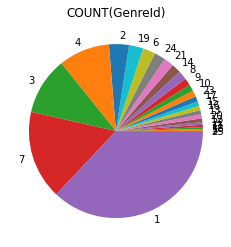

In [33]:

result = %sql select GenreId,COUNT(GenreId) from Track group by GenreId order by COUNT(GenreId);
%matplotlib inline
result.pie()